In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [164]:
app = pd.read_csv('Open_Restaurant_Applications.csv')

In [167]:
app.columns

Index(['objectid', 'Seating Interest (Sidewalk/Roadway/Both)',
       'Restaurant Name', 'Legal Business Name', 'Doing Business As (DBA)',
       'Street', 'Borough', 'Postcode', 'Business Address',
       'Sidewalk Dimensions (Length)', 'Sidewalk Dimensions (Width)',
       'Sidewalk Dimensions (Area)', 'Roadway Dimensions (Length)',
       'Roadway Dimensions (Width)', 'Roadway Dimensions (Area)',
       'Approved for Sidewalk Seating', 'Approved for Roadway Seating',
       'Qualify Alcohol', 'SLA License Type', 'Time of Submission', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [172]:
app.groupby('Borough')['objectid'].count().sort_values(ascending=False)

Borough
Manhattan        6538
Brooklyn         3279
Queens           2601
Bronx             711
Staten Island     201
Name: objectid, dtype: int64

<AxesSubplot:xlabel='Borough'>

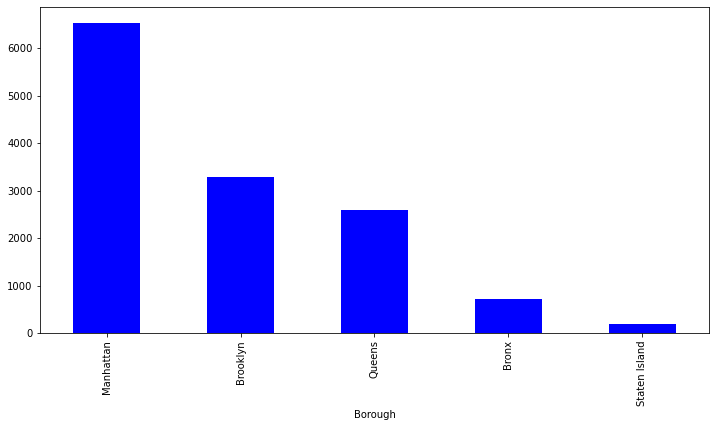

In [175]:
#total num of restaurants that applied for open dining by borough

plt.figure(figsize = (12,6))
app.groupby('Borough')['objectid'].count().sort_values(ascending=False).plot.bar(color = 'b')

In [208]:
borough_complaints = data.groupby('Borough')[['Unique Key']].count()
borough_complaints.rename(columns={'Unique Key': 'Total Complaints'}, inplace=True)

In [220]:
borough_complaints.rename(index={'BRONX': 'Bronx', 'BROOKLYN':'Brooklyn', 
                                  'MANHATTAN': 'Manhattan', 'QUEENS':'Queens', 
                                  'STATEN ISLAND':'Staten Island'}, inplace=True)

In [213]:
borough_app = app.groupby('Borough')[['objectid']].count()
borough_app.rename(columns={'objectid': 'Total Applications'}, inplace=True)

In [222]:
borough_app_comp = pd.concat([borough_app,borough_complaints], axis=1)

In [236]:
borough_app_comp.sort_values(by='Total Applications', ascending=False, inplace=True)

In [238]:
borough_app_comp.reset_index(inplace=True)

<AxesSubplot:xlabel='Borough'>

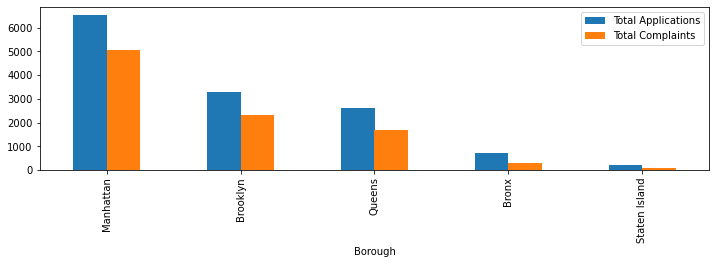

In [253]:
borough_app_comp.plot(kind='bar',x='Borough',y=['Total Applications', 'Total Complaints'])

In [176]:
data = pd.read_csv('311_Service_Requests_from_2010_to_Present_Open_Dining.csv')

In [177]:
# This dataset is all 311 complaints filed under the category "open dining", there are 9,487

In [178]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution',
       'Resolution Action Updated Date', 'Community Board', 'BBL', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Open Data Channel Type', 'Park Facility Name', 'Park Borough',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [254]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Address Type', 'City', 'Landmark',
       'Status', 'Resolution Description', 'Resolution',
       'Resolution Action Updated Date', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Latitude',
       'Longitude', 'Location', 'Year', 'Month', 'Year_Month'],
      dtype='object')

In [179]:
#dropped unrelated columns

data.drop(['Agency', 'Due Date', 'Facility Type', 'Cross Street 1', 'Cross Street 2', 
           'Intersection Street 1', 'Intersection Street 2', 'Community Board', 'BBL', 
           'Open Data Channel Type', 'Park Facility Name', 'Park Borough', 'Vehicle Type', 
           'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction',
           'Road Ramp', 'Bridge Highway Segment'], axis = 1, inplace=True)

In [180]:
#remove unspecified boroughs

data = data[data['Borough'] != 'Unspecified']

In [181]:
#create a year column from the Created Date
data['Year'] = pd.DatetimeIndex(data['Created Date']).year

In [182]:
data['Month'] = pd.DatetimeIndex(data['Created Date']).month

In [183]:
data['Year_Month'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

In [184]:
#complaints by boroughs

In [185]:
data.groupby('Borough')['Unique Key'].count().sort_values(ascending=False)

Borough
MANHATTAN        5039
BROOKLYN         2343
QUEENS           1711
BRONX             292
STATEN ISLAND      94
Name: Unique Key, dtype: int64

<AxesSubplot:xlabel='Borough'>

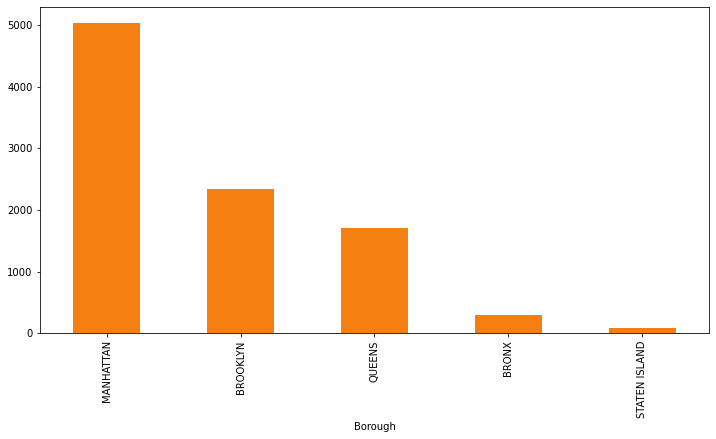

In [262]:
plt.figure(figsize = (12,6))
data.groupby('Borough')['Unique Key'].count().sort_values(ascending=False).plot.bar(color = '#F67F12')

In [187]:
df_m = data[data['Borough'] == 'MANHATTAN']

In [188]:
#complaints over time in manhattan

In [189]:
df_m.groupby('Year_Month')['Unique Key'].count()

Year_Month
2020-07-01    326
2020-08-01    545
2020-09-01    447
2020-10-01    309
2020-11-01    220
2020-12-01    161
2021-01-01    155
2021-02-01     72
2021-03-01    157
2021-04-01    199
2021-05-01    243
2021-06-01    231
2021-07-01    261
2021-08-01    232
2021-09-01    195
2021-10-01    332
2021-11-01    249
2021-12-01    165
2022-01-01    139
2022-02-01    106
2022-03-01    178
2022-04-01    117
Name: Unique Key, dtype: int64

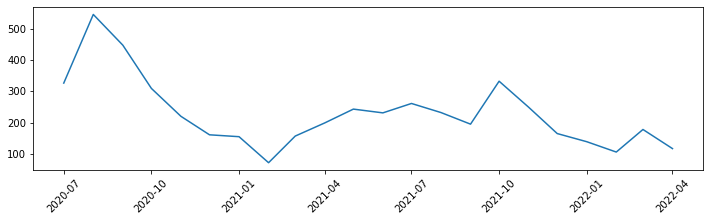

In [190]:
plt.plot(df_m.groupby('Year_Month')['Unique Key'].count())
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

In [191]:
#create datafram for total complaints by year

In [192]:
df_ym = df_m.groupby('Year_Month')[['Unique Key']].count()

In [193]:
df_ym.rename(columns={'Unique Key': 'Total Complaints'}, inplace=True)

In [194]:
df_ym = df_ym.reset_index()

In [195]:
df_ym['Year_Month']

0    2020-07-01
1    2020-08-01
2    2020-09-01
3    2020-10-01
4    2020-11-01
5    2020-12-01
6    2021-01-01
7    2021-02-01
8    2021-03-01
9    2021-04-01
10   2021-05-01
11   2021-06-01
12   2021-07-01
13   2021-08-01
14   2021-09-01
15   2021-10-01
16   2021-11-01
17   2021-12-01
18   2022-01-01
19   2022-02-01
20   2022-03-01
21   2022-04-01
Name: Year_Month, dtype: datetime64[ns]

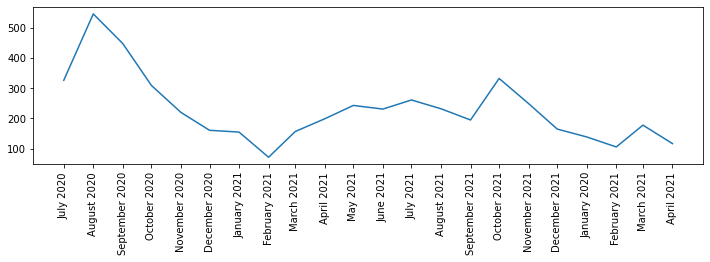

In [245]:
x = df_ym['Year_Month']
y = list(df_ym['Total Complaints'])
labels = ['July 2020', 'August 2020', 'September 2020', 'October 2020', 'November 2020', 'December 2020', 
          'January 2021', 'February 2021', 'March 2021', 'April 2021', 'May 2021', 'June 2021', 
          'July 2021', 'August 2021', 'September 2021', 'October 2021',
         'November 2021', 'December 2021', 'January 2020', 'February 2021', 'March 2021', 'April 2021']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.rcParams["figure.figsize"] = (12,3)

plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.05)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.tick_params(axis='x', labelrotation = 90)
plt.show()

In [197]:
#types of total complaints by raw counts

In [198]:
data.groupby('Descriptor')['Descriptor'].count().sort_values(ascending=False)

Descriptor
Sidewalk Zone Blocked      3756
Site Setup Condition       2982
Barrier Condition          1087
Street Zone Blocked        1055
Unauthorized Restaurant     309
Table Not in Compliance     253
ADA Ramp Missing             24
Utility Cover Blocked         9
Platform Condition            4
Name: Descriptor, dtype: int64

<AxesSubplot:xlabel='Descriptor'>

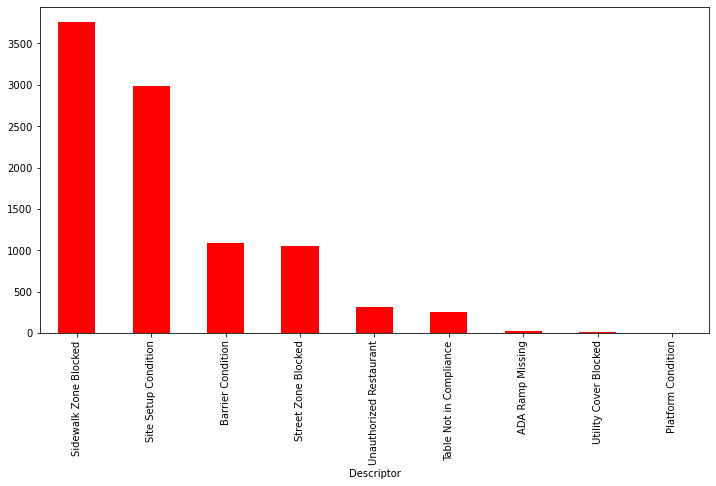

In [203]:
plt.figure(figsize = (12,6))
data.groupby('Descriptor')['Descriptor'].count().sort_values(ascending=False).plot.bar(color = 'r')

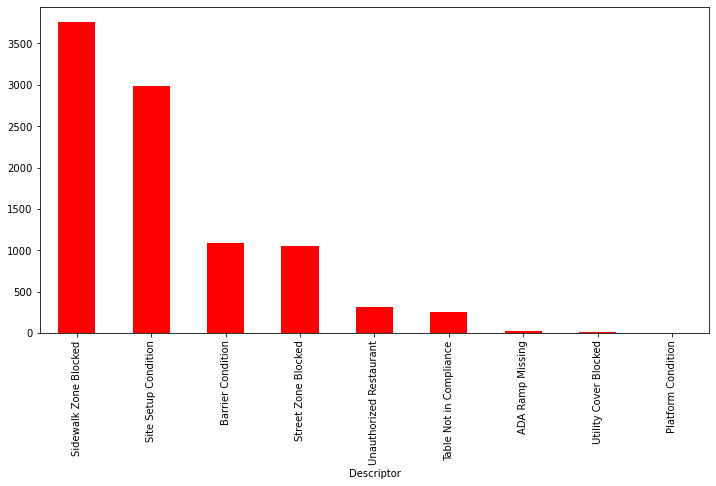

In [255]:
plt.figure(figsize = (12,6))
data.groupby('Descriptor')['Descriptor'].count().sort_values(ascending=False).plot.bar(color = 'r')
ax.invert_yaxis()

In [200]:
df_m.groupby('Resolution')[['Unique Key']].count().sort_values(by='Unique Key', ascending=False)

,Unique Key
Resolution,
Not in compliance,2005
In compliance,1648
Misc,1168
Not authorized,123
Referred to another agency,95


<AxesSubplot:xlabel='Resolution'>

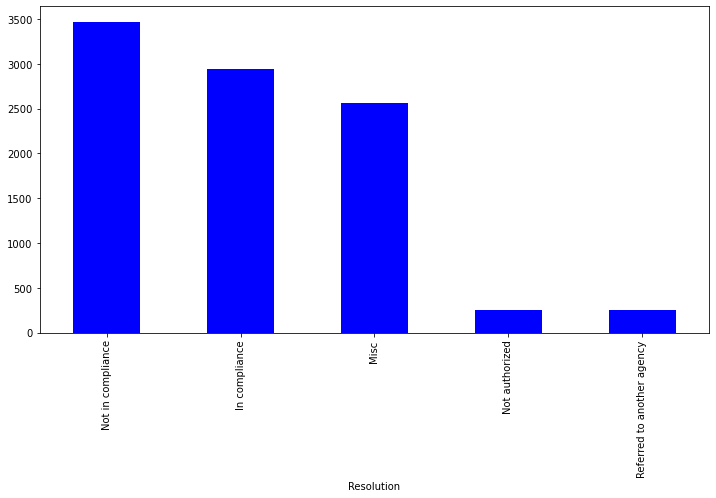

In [201]:
plt.figure(figsize = (12,6))
data.groupby('Resolution')['Unique Key'].count().sort_values(ascending=False).plot.bar(color = 'b')

In [160]:
#*Update* cleaned up code with regex
#x.groupby('Resolution Description')[['Unique Key']].count()